In [1]:
# %load C60_jupyter_imports.py
%load_ext autoreload
%autoreload 2

import xarray as xr
import numpy as np
from dask.distributed import Client
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import xesmf as xe
from scipy.stats import linregress
import os
import requests
import cftime
# Lets import our functions. There are no tests here. Stored separately so as to not make a mess.
# Make sure in right dir first

os.chdir('/g/data/xv83/np1383/src_CAFE60_eqpac_analysis_code/')

In [2]:
ls /g/data/xv83/dcfp/CAFE60v1/ocean_month.zarr.zip

/g/data/xv83/dcfp/CAFE60v1/ocean_month.zarr.zip*


In [3]:
phys=xr.open_zarr('/g/data/xv83/dcfp/CAFE60v1/ocean_month.zarr.zip')

In [5]:
bgc=xr.open_zarr('/g/data/xv83/dcfp/CAFE60v1/ocean_bgc_month.zarr.zip')
bgc=bgc.rename({'xt_ocean':'lon','yt_ocean':'lat'})
bgc['lon']=bgc['lon']+360
eqpac=bgc.sel(lon=slice(120,290),lat=slice(-20,20))
#eqpac.time
eqpac

,Array,Chunk
Bytes,214.49 GiB,18.30 MiB
Shape,"(720, 96, 50, 98, 170)","(1, 96, 3, 98, 170)"
Count,24481 Tasks,12240 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,214.49 GiB,18.30 MiB
Shape,"(720, 96, 50, 98, 170)","(1, 96, 3, 98, 170)"
Count,24481 Tasks,12240 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [8]:
phys

,Array,Chunk
Bytes,1.36 TiB,118.65 MiB
Shape,"(720, 96, 50, 300, 360)","(1, 96, 3, 300, 360)"
Count,12241 Tasks,12240 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,1.36 TiB,118.65 MiB
Shape,"(720, 96, 50, 300, 360)","(1, 96, 3, 300, 360)"
Count,12241 Tasks,12240 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


In [9]:
zonal_current=phys.u

In [10]:
zonal_current=zonal_current.rename({'xu_ocean':'lon','yu_ocean':'lat'})
zonal_current['lon']=zonal_current['lon']+360
zonal_current=zonal_current.sel(lon=slice(120,290),lat=slice(-20,20))

In [11]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:35645")
client

<Client: 'tcp://127.0.0.1:35645' processes=8 threads=8, memory=22.46 GiB>

In [9]:
save_cutout=False
if save_cutout==True:
    dat=eqpac.sel(ensemble=25).sel(st_ocean=slice(0,2000))
    print(dat.nbytes/1e9)
    dat.to_zarr('../processed_data/cafe/eqpac/surface_bgc_ocean.zarr')

In [12]:
var='no3'
nitrate_ew_pac=eqpac[var].sel(ensemble=25,lat=0,method='nearest').sel(st_ocean=slice(0,1000))
nitrate_ew_pac['st_ocean']=nitrate_ew_pac['st_ocean']*-1
#nitrate_ew_pac.load()
#nitrate_ew_pac
nitrate_ew_pac80=nitrate_ew_pac.sel(time=slice(cftime.DatetimeJulian(1980, 1, 1),cftime.DatetimeJulian(1980, 12, 31))).mean(dim='time')
nitrate_ew_pac2020=nitrate_ew_pac.sel(time=slice(cftime.DatetimeJulian(2019, 1, 1),cftime.DatetimeJulian(2019, 12, 31))).mean(dim='time')
nitrate_ew_pac_tdiff=nitrate_ew_pac2020-nitrate_ew_pac80

#nitrate_ew_pac80.plot(vmin=0,vmax=70)
#nitrate_ew_pac2020.plot(vmin=0,vmax=70)

,Array,Chunk
Bytes,14.01 MiB,1.99 kiB
Shape,"(720, 30, 170)","(1, 3, 170)"
Count,43921 Tasks,7200 Chunks
Type,float32,numpy.ndarray


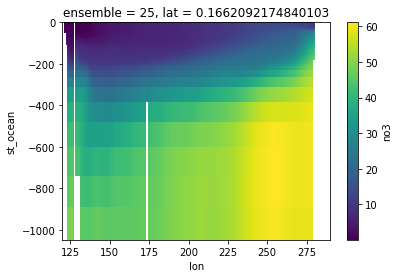

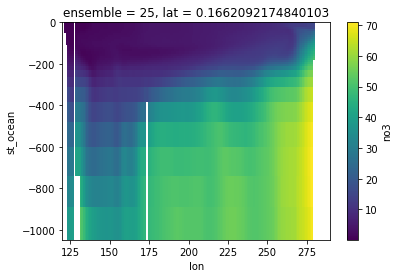

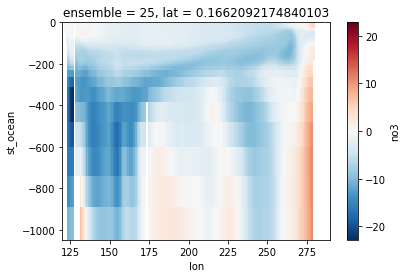

In [25]:
var='no3' #no3, fe
lat=0
ensemble=25

nitrate_ew_pac=eqpac[var].sel(ensemble=ensemble,lat=lat,method='nearest').sel(st_ocean=slice(0,1000))
nitrate_ew_pac['st_ocean']=nitrate_ew_pac['st_ocean']*-1
#nitrate_ew_pac.load()
#nitrate_ew_pac
nitrate_ew_pac80=nitrate_ew_pac.sel(time=slice(cftime.DatetimeJulian(1980, 1, 1),cftime.DatetimeJulian(1980, 12, 31))).mean(dim='time')
nitrate_ew_pac2020=nitrate_ew_pac.sel(time=slice(cftime.DatetimeJulian(2019, 1, 1),cftime.DatetimeJulian(2019, 12, 31))).mean(dim='time')
nitrate_ew_pac_tdiff=nitrate_ew_pac2020-nitrate_ew_pac80

nitrate_ew_pac80.plot()#(vmin=0,vmax=200)
plt.show()
nitrate_ew_pac2020.plot()#(vmin=0,vmax=200)
plt.show()
nitrate_ew_pac_tdiff.plot(cmap='bwr')#(vmin=-75,vmax=75,)
plt.show()

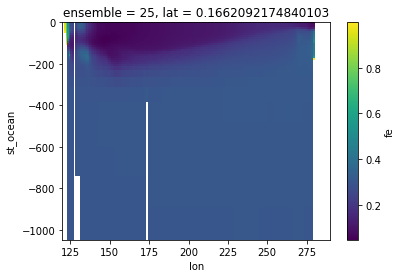

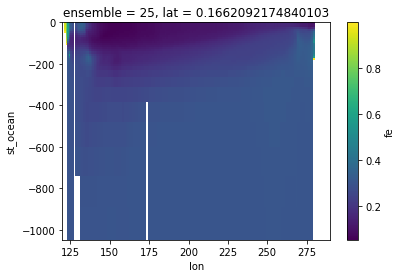

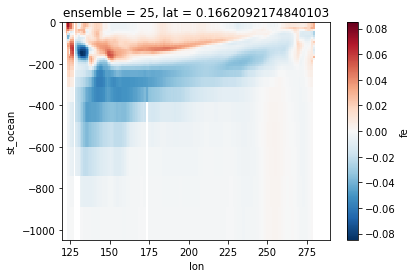

In [26]:
var='fe' #no3, fe
lat=0
ensemble=25

nitrate_ew_pac=eqpac[var].sel(ensemble=ensemble,lat=lat,method='nearest').sel(st_ocean=slice(0,1000))
nitrate_ew_pac['st_ocean']=nitrate_ew_pac['st_ocean']*-1
#nitrate_ew_pac.load()
#nitrate_ew_pac
nitrate_ew_pac80=nitrate_ew_pac.sel(time=slice(cftime.DatetimeJulian(1980, 1, 1),cftime.DatetimeJulian(1980, 12, 31))).mean(dim='time')
nitrate_ew_pac2020=nitrate_ew_pac.sel(time=slice(cftime.DatetimeJulian(2019, 1, 1),cftime.DatetimeJulian(2019, 12, 31))).mean(dim='time')
nitrate_ew_pac_tdiff=nitrate_ew_pac2020-nitrate_ew_pac80

nitrate_ew_pac80.plot()#(vmin=0,vmax=200)
plt.show()
nitrate_ew_pac2020.plot()#(vmin=0,vmax=200)
plt.show()
nitrate_ew_pac_tdiff.plot(cmap='bwr')#(vmin=-75,vmax=75,cmap='bwr')
plt.show()

,Array,Chunk
Bytes,217.95 GiB,18.60 MiB
Shape,"(720, 96, 50, 99, 171)","(1, 96, 3, 99, 171)"
Count,24481 Tasks,12240 Chunks
Type,float32,numpy.ndarray


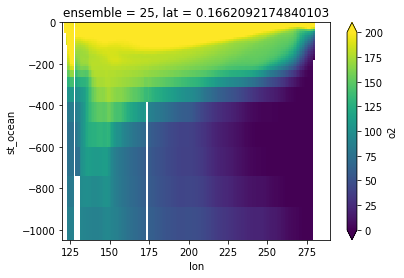

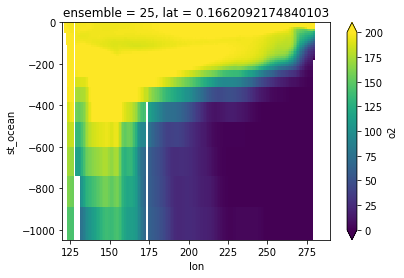

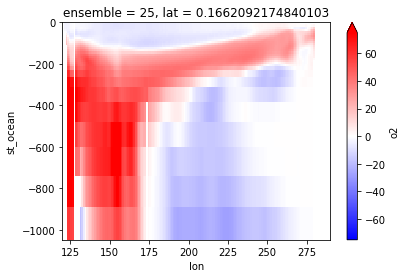

In [16]:
var='o2' #no3, fe
lat=0
ensemble=25

nitrate_ew_pac=eqpac[var].sel(ensemble=ensemble,lat=lat,method='nearest').sel(st_ocean=slice(0,1000))
nitrate_ew_pac['st_ocean']=nitrate_ew_pac['st_ocean']*-1
#nitrate_ew_pac.load()
#nitrate_ew_pac
nitrate_ew_pac80=nitrate_ew_pac.sel(time=slice(cftime.DatetimeJulian(1980, 1, 1),cftime.DatetimeJulian(1980, 12, 31))).mean(dim='time')
nitrate_ew_pac2020=nitrate_ew_pac.sel(time=slice(cftime.DatetimeJulian(2019, 1, 1),cftime.DatetimeJulian(2019, 12, 31))).mean(dim='time')
nitrate_ew_pac_tdiff=nitrate_ew_pac2020-nitrate_ew_pac80

nitrate_ew_pac80.plot(vmin=0,vmax=200)
plt.show()
nitrate_ew_pac2020.plot(vmin=0,vmax=200)
plt.show()
nitrate_ew_pac_tdiff.plot(vmin=-75,vmax=75,cmap='bwr')
plt.show()

In [26]:
zc=zonal_current.sel(ensemble=25,lat=0,method='nearest').sel(st_ocean=slice(0,1000))
zc['st_ocean']=zc['st_ocean']*-1
zc=zc.sel(time=slice(cftime.DatetimeJulian(1980, 1, 1),cftime.DatetimeJulian(1980, 12, 31))).mean(dim='time')
zc.plot.quiver(x=lat,y=time)

In [34]:
zc

<xarray.DataArray 'u' (st_ocean: 30, lon: 171)>
dask.array<mean_agg-aggregate, shape=(30, 171), dtype=float32, chunksize=(3, 171), chunktype=numpy.ndarray>
Coordinates:
    ensemble  int32 25
  * st_ocean  (st_ocean) float64 -5.0 -15.0 -25.0 -35.0 ... -665.4 -812.8 -969.1
  * lon       (lon) float64 120.0 121.0 122.0 123.0 ... 287.0 288.0 289.0 290.0
    lat       float64 -1e-09

In [ ]:
plt.quiver([zc.lon,zc.st_ocean],zc,0)

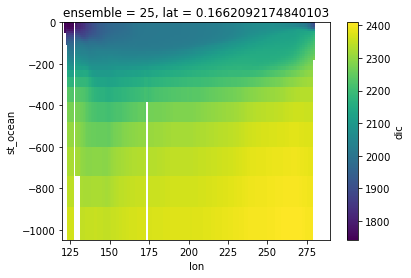

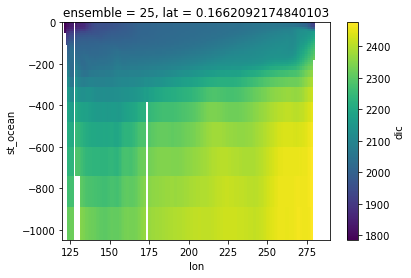

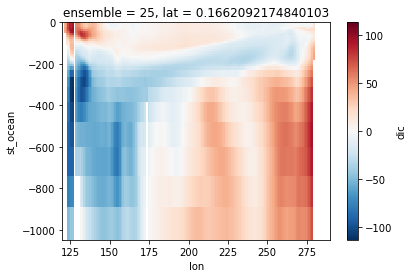

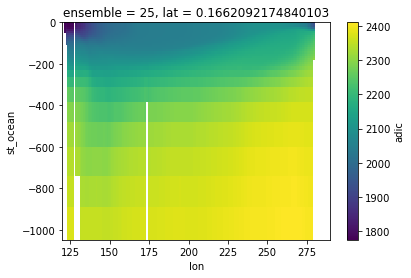

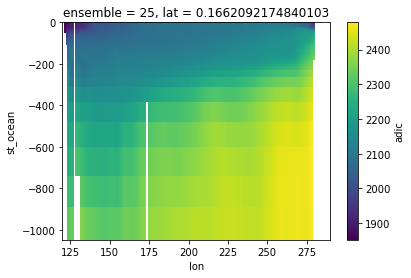

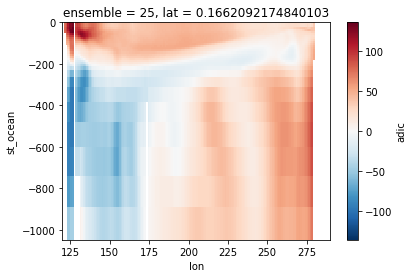

In [19]:
varx=['dic','adic'] #no3, fe
for i,var in enumerate(varx):
    lat=0
    ensemble=25

    dic_ew_pac=eqpac[var].sel(ensemble=ensemble,lat=lat,method='nearest').sel(st_ocean=slice(0,1000))
    dic_ew_pac['st_ocean']=dic_ew_pac['st_ocean']*-1

    dic_ew_pac80=dic_ew_pac.sel(time=slice(cftime.DatetimeJulian(1970, 1, 1),cftime.DatetimeJulian(1990, 12, 31))).mean(dim='time')
    dic_ew_pac2020=dic_ew_pac.sel(time=slice(cftime.DatetimeJulian(2000, 1, 1),cftime.DatetimeJulian(2019, 12, 31))).mean(dim='time')
    dic_ew_pac_tdiff=dic_ew_pac2020-dic_ew_pac80

    dic_ew_pac80.plot()#(vmin=0,vmax=150)
    plt.show()
    dic_ew_pac2020.plot()#(vmin=0,vmax=150)
    plt.show()
    dic_ew_pac_tdiff.plot()#(vmin=-100,vmax=100)
    plt.quiver(zc.lon,zc.st_ocean,zc)
    plt.show()
    
    if i==0:
        dic80=dic_ew_pac80
        dic20=dic_ew_pac2020
    elif i==1:
        adic80=dic_ew_pac80
        adic20=dic_ew_pac2020

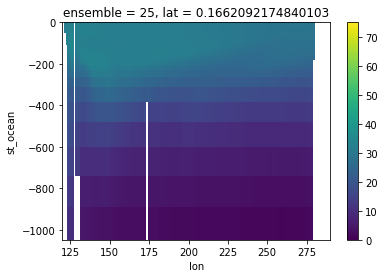

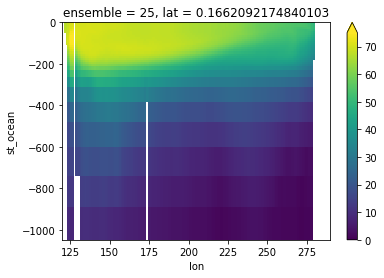

In [27]:
(adic80-dic80).plot(vmin=0,vmax=75)
plt.show()
(adic20-dic20).plot(vmin=0,vmax=75)
plt.show()


In [29]:
# Try do the Latitudinal cross section, but need to fix the chunking maybe.
nitrate_ens_pac=eqpac.no3.sel(ensemble=25,lon=260,method='nearest').sel(st_ocean=slice(0,1000))
nitrate_ens_pac['st_ocean']=nitrate_ens_pac['st_ocean']*-1
#nitrate_ens_pac.load()

In [30]:
nitrate_ens_pac80=nitrate_ens_pac.sel(time=slice(cftime.DatetimeJulian(1980, 1, 1),cftime.DatetimeJulian(1980, 12, 31))).mean(dim='time').chunk({'lat':1})

In [31]:
nitrate_ens_pac80

<xarray.DataArray 'no3' (st_ocean: 30, lat: 98)>
dask.array<rechunk-merge, shape=(30, 98), dtype=float32, chunksize=(3, 1), chunktype=numpy.ndarray>
Coordinates:
    ensemble  int32 25
  * st_ocean  (st_ocean) float64 -5.0 -15.0 -25.0 -35.0 ... -665.4 -812.8 -969.1
    lon       float64 260.5
  * lat       (lat) float64 -19.36 -18.59 -17.85 -17.15 ... 17.85 18.59 19.36

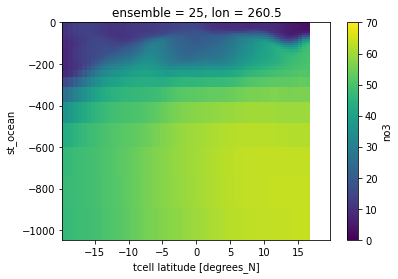

In [32]:
nitrate_ens_pac80.plot(vmin=0,vmax=70)

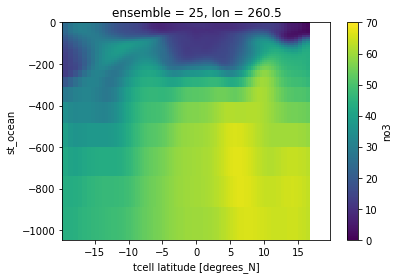

In [34]:
nitrate_ens_pac2020=nitrate_ens_pac.sel(time=slice(cftime.DatetimeJulian(2019, 1, 1),cftime.DatetimeJulian(2019, 12, 31))).mean(dim='time')
nitrate_ens_pac2020.plot(vmin=0,vmax=70)

In [39]:
# Try do the Latitudinal cross section, but need to fix the chunking maybe.
nitrate_wns_pac=eqpac.no3.sel(ensemble=25,lon=160,method='nearest').sel(st_ocean=slice(0,1000))
nitrate_wns_pac['st_ocean']=nitrate_wns_pac['st_ocean']*-1
#nitrate_ens_pac.load()
nitrate_wns_pac80=nitrate_wns_pac.sel(time=slice(cftime.DatetimeJulian(1980, 1, 1),cftime.DatetimeJulian(1980, 12, 31))).mean(dim='time')
nitrate_wns_pac2020=nitrate_wns_pac.sel(time=slice(cftime.DatetimeJulian(2019, 1, 1),cftime.DatetimeJulian(2019, 12, 31))).mean(dim='time')

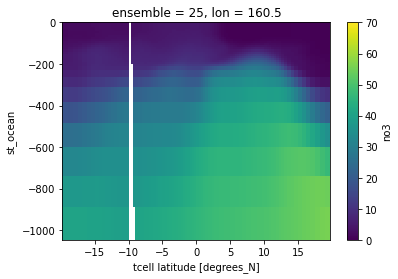

In [40]:
nitrate_wns_pac80.plot(vmin=0,vmax=70)

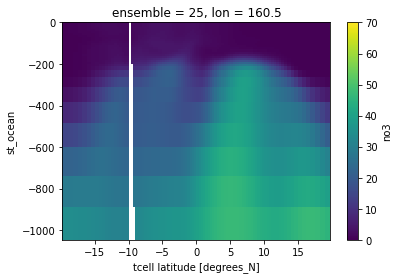

In [42]:
nitrate_wns_pac2020.plot(vmin=0,vmax=70)